In [5]:
import os
import re
from typing import List
from pathlib import Path
from langchain_core.documents import Document
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_ollama import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import MarkdownHeaderTextSplitter

# Semantic Chunking을 활용한 마크다운 문서 분할

이 노트북에서는 `MarkdownHeaderTextSplitter`를 사용하여 `data/dev_center_guide_allmd.md` 파일을 의미적으로 분할하고 Document 객체를 생성합니다.

In [6]:
# 마크다운 파일 로드
markdown_file_path = "data/dev_center_guide_allmd.md"

# 파일 존재 확인
if not os.path.exists(markdown_file_path):
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {markdown_file_path}")

# 파일 내용 읽기
with open(markdown_file_path, 'r', encoding='utf-8') as f:
    markdown_content = f.read()

print(f"마크다운 파일 로드 완료: {len(markdown_content)} 문자")
print(f"파일 경로: {markdown_file_path}")

마크다운 파일 로드 완료: 383199 문자
파일 경로: data/dev_center_guide_allmd.md


In [7]:
# MarkdownHeaderTextSplitter 설정
# 헤더 레벨별로 분할할 수 있도록 설정
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4"),
    ("#####", "Header 5"),
    ("######", "Header 6"),
]

# MarkdownHeaderTextSplitter 초기화
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on,
    return_each_line=False,  # 각 라인을 별도로 반환하지 않음
)

print("MarkdownHeaderTextSplitter 설정 완료")
print(f"분할할 헤더 레벨: {len(headers_to_split_on)}개")

MarkdownHeaderTextSplitter 설정 완료
분할할 헤더 레벨: 6개


In [8]:
# 의미적 분할 수행
print("마크다운 문서를 의미적으로 분할 중...")

# MarkdownHeaderTextSplitter로 분할
semantic_chunks = markdown_splitter.split_text(markdown_content)

print(f"분할 완료: {len(semantic_chunks)}개의 청크 생성")

# 첫 번째 청크 샘플 출력
if semantic_chunks:
    print("\n=== 첫 번째 청크 샘플 ===")
    print(f"청크 길이: {len(semantic_chunks[0].page_content)} 문자")
    print(f"청크 내용 (처음 200자): {semantic_chunks[0].page_content[:200]}...")
    
    # 헤더 정보 확인
    print(f"메타데이터: {semantic_chunks[0].metadata}")

마크다운 문서를 의미적으로 분할 중...
분할 완료: 495개의 청크 생성

=== 첫 번째 청크 샘플 ===
청크 길이: 60 문자
청크 내용 (처음 200자): 출처: https://onestore-dev.gitbook.io/dev/tools/billing/v21.md...
메타데이터: {}


In [9]:
# Document 객체들은 이미 생성되어 있음
documents = semantic_chunks

# 각 Document의 메타데이터에 추가 정보 설정
for i, doc in enumerate(documents):
    # 기존 메타데이터에 추가 정보 설정
    doc.metadata.update({
        'source': markdown_file_path,
        'chunk_id': i,
        'chunk_type': 'semantic_markdown',
        'content_length': len(doc.page_content),
    })

print(f"Document 객체 생성 완료: {len(documents)}개")

# 통계 정보 출력
if documents:
    total_chars = sum(len(doc.page_content) for doc in documents)
    avg_chars = total_chars / len(documents)
    
    print(f"\n=== 통계 정보 ===")
    print(f"총 문서 수: {len(documents)}개")
    print(f"총 문자 수: {total_chars:,}자")
    print(f"평균 청크 크기: {avg_chars:.1f}자")
    
    # 헤더가 있는 문서 수
    docs_with_headers = [doc for doc in documents if any(key.startswith('Header') for key in doc.metadata.keys())]
    print(f"헤더가 포함된 문서: {len(docs_with_headers)}개")
    
    # 첫 번째 문서 샘플 출력
    print(f"\n=== 첫 번째 Document 샘플 ===")
    first_doc = documents[0]
    print(f"메타데이터: {first_doc.metadata}")
    print(f"내용 (처음 150자): {first_doc.page_content[:150]}...")

Document 객체 생성 완료: 495개

=== 통계 정보 ===
총 문서 수: 495개
총 문자 수: 328,352자
평균 청크 크기: 663.3자
헤더가 포함된 문서: 494개

=== 첫 번째 Document 샘플 ===
메타데이터: {'source': 'data/dev_center_guide_allmd.md', 'chunk_id': 0, 'chunk_type': 'semantic_markdown', 'content_length': 60}
내용 (처음 150자): 출처: https://onestore-dev.gitbook.io/dev/tools/billing/v21.md...


=== 청크 분석 결과 ===
최소 청크 크기: 3자
최대 청크 크기: 10416자
중간값 청크 크기: 323.0자
표준편차: 1061.5자

헤더 정보 분석:
  Header 1: 494개 문서
  Header 2: 422개 문서
  Header 3: 367개 문서
  Header 4: 96개 문서


/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_88283/3611362754.py:43: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_88283/3611362754.py:43: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_88283/3611362754.py:43: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_88283/3611362754.py:43: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_88283/3611362754.py:43: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipyker

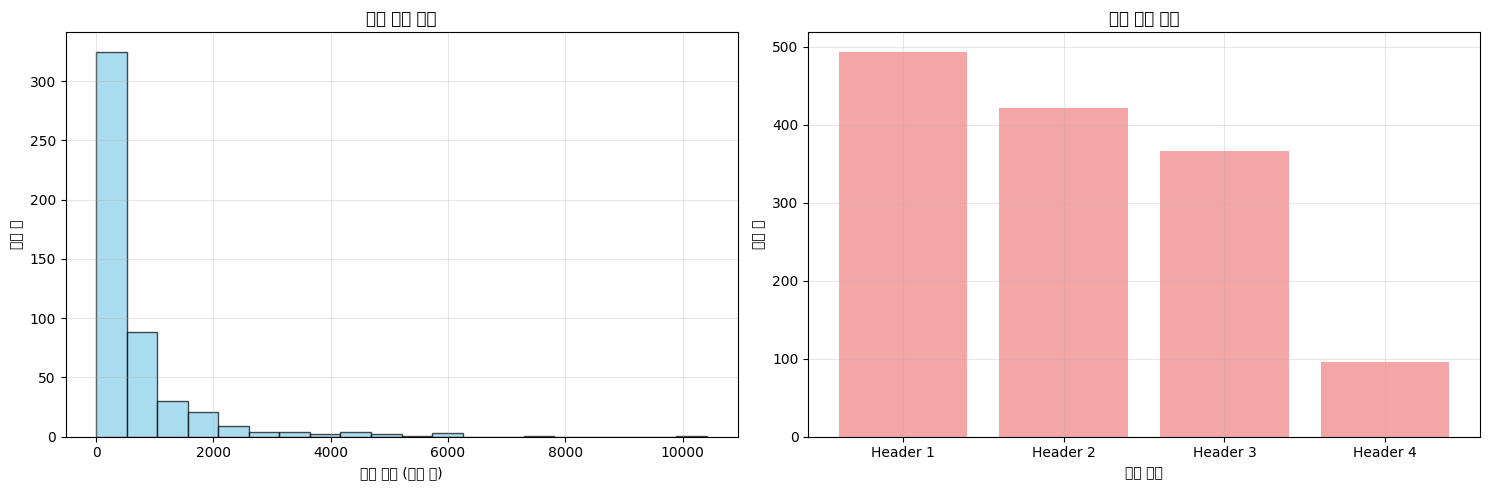

In [10]:
# 청크 분석 및 시각화
import matplotlib.pyplot as plt
import numpy as np

# 청크 크기 분포 분석
chunk_sizes = [len(doc.page_content) for doc in documents]

print("=== 청크 분석 결과 ===")
print(f"최소 청크 크기: {min(chunk_sizes)}자")
print(f"최대 청크 크기: {max(chunk_sizes)}자")
print(f"중간값 청크 크기: {np.median(chunk_sizes):.1f}자")
print(f"표준편차: {np.std(chunk_sizes):.1f}자")

# 헤더 정보 분석
print(f"\n헤더 정보 분석:")
header_types = {}
for doc in documents:
    for key in doc.metadata.keys():
        if key.startswith('Header'):
            header_types[key] = header_types.get(key, 0) + 1

for header_type, count in sorted(header_types.items()):
    print(f"  {header_type}: {count}개 문서")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 청크 크기 분포
ax1.hist(chunk_sizes, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('청크 크기 (문자 수)')
ax1.set_ylabel('문서 수')
ax1.set_title('청크 크기 분포')
ax1.grid(True, alpha=0.3)

# 헤더 타입 분포
if header_types:
    ax2.bar(header_types.keys(), header_types.values(), alpha=0.7, color='lightcoral')
    ax2.set_xlabel('헤더 타입')
    ax2.set_ylabel('문서 수')
    ax2.set_title('헤더 타입 분포')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# 생성된 Document 객체들을 파일로 저장 (선택사항)
import pickle
import json

# pickle로 저장
output_dir = "../result"
os.makedirs(output_dir, exist_ok=True)

pickle_path = os.path.join(output_dir, "semantic_chunks_documents.pkl")
with open(pickle_path, 'wb') as f:
    pickle.dump(documents, f)

print(f"Document 객체들이 pickle로 저장되었습니다: {pickle_path}")

# 메타데이터만 JSON으로 저장 (인간이 읽기 쉬운 형태)
metadata_list = []
for doc in documents:
    metadata_list.append({
        'chunk_id': doc.metadata['chunk_id'],
        'headers': [key for key in doc.metadata.keys() if key.startswith('Header')],
        'header_count': len([key for key in doc.metadata.keys() if key.startswith('Header')]),
        'content_length': doc.metadata['content_length'],
        'content_preview': doc.page_content[:200] + '...' if len(doc.page_content) > 200 else doc.page_content
    })

json_path = os.path.join(output_dir, "semantic_chunks_metadata.json")
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(metadata_list, f, ensure_ascii=False, indent=2)

print(f"메타데이터가 JSON으로 저장되었습니다: {json_path}")
print(f"\n총 {len(documents)}개의 의미적 청크가 생성되어 저장되었습니다.")

Document 객체들이 pickle로 저장되었습니다: ../result/semantic_chunks_documents.pkl
메타데이터가 JSON으로 저장되었습니다: ../result/semantic_chunks_metadata.json

총 495개의 의미적 청크가 생성되어 저장되었습니다.
